In [ ]:
# Step 1: Import Necessary Libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



In [ ]:
# Step 2: Load the Dataset
df = pd.read_csv('/content/Influencer.csv')

# Step 3: Explore the Dataset
print("First few rows of the dataset:")
df.head()



First few rows of the dataset:


,Rank,Channel Info,Influence Score,Followers,Avg. Likes,Posts,60-Day Eng Rate,New Post Avg. Likes,Total Likes,Country Or Region
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States
2,3,\nleomessi,90,363.9m,6.7m,915,0.010,3.5m,6.1b,NaN
3,4,\nselenagomez,93,348.8m,6.1m,1.9k,0.005,1.7m,11.4b,United States
4,5,\ntherock,91,339.4m,1.8m,6.8k,0.003,932.0k,12.6b,United States


In [ ]:

print(df.shape)

(200, 10)


# Data Wrangling

# Renaming column names

In [ ]:
df.rename(columns = {'Country Or Region':'Country', 'Avg. Likes': 'Avg_likes','60-Day Eng Rate': '60Day_Eng_Rate','New Post Avg. Likes': 'NewPost_Avg_Likes', 'Total Likes': 'Total_Likes', 'Influence Score': 'Influence_Score', 'Channel Info': 'Channel_Info' }, inplace = True)


Checking Null values

In [ ]:
df.isna().sum()

Rank                  0
Channel_Info          0
Influence_Score       0
Followers             0
Avg_likes             0
Posts                 0
60Day_Eng_Rate        0
NewPost_Avg_Likes     0
Total_Likes           0
Country              63
dtype: int64

# Filling the null values by forward filling

> Indented block



In [ ]:
df.Country.fillna( method ='ffill', inplace = True)

In [ ]:
df.isna().sum()

Rank                 0
Channel_Info         0
Influence_Score      0
Followers            0
Avg_likes            0
Posts                0
60Day_Eng_Rate       0
NewPost_Avg_Likes    0
Total_Likes          0
Country              0
dtype: int64

In [ ]:
df.info()
print('\n')
df.head(2)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Rank               200 non-null    int64  
 1   Channel_Info       200 non-null    object 
 2   Influence_Score    200 non-null    int64  
 3   Followers          200 non-null    object 
 4   Avg_likes          200 non-null    object 
 5   Posts              200 non-null    object 
 6   60Day_Eng_Rate     200 non-null    float64
 7   NewPost_Avg_Likes  200 non-null    object 
 8   Total_Likes        200 non-null    object 
 9   Country            200 non-null    object 
dtypes: float64(1), int64(2), object(7)
memory usage: 15.8+ KB




,Rank,Channel_Info,Influence_Score,Followers,Avg_likes,Posts,60Day_Eng_Rate,NewPost_Avg_Likes,Total_Likes,Country
0,1,\ncristiano,92,485.2m,8.7m,3.4k,0.013,6.3m,29.1b,Spain
1,2,kyliejenner,91,370.7m,8.2m,7.0k,0.014,5.0m,57.4b,United States


# Converting the milestones to their respective values

In [ ]:
# Customized conversion factors
conversion_factors = {'b': 1e9, 'm': 1e6, 'k': 1e3}


df['Followers_Count'] = df.Followers.str.extract('(\d+\.\d+|\d+)').astype(float)
df['Followers_Milestone'] = df.Followers.str.extract(r'([a-zA-Z]+)')
df['Followers_Count'] *= df['Followers_Milestone'].map(conversion_factors).fillna(1)
df = df.drop('Followers_Milestone', axis=1)

df['Avg_likes_Count'] = df.Avg_likes.str.extract('(\d+\.\d+|\d+)').astype(float)
df['Avg_likes_Milestone'] = df.Avg_likes.str.extract(r'([a-zA-Z]+)')
df['Avg_likes_Count'] *= df['Avg_likes_Milestone'].map(conversion_factors).fillna(1)
df = df.drop('Avg_likes_Milestone', axis=1)

df['Posts_Count'] = df.Posts.str.extract('(\d+\.\d+|\d+)').astype(float)
df['Posts_Milestone'] = df.Posts.str.extract(r'([a-zA-Z]+)')
df['Posts_Count'] *= df['Posts_Milestone'].map(conversion_factors).fillna(1)
df = df.drop('Posts_Milestone', axis=1)


df['NewPost_Avg_Likes_Count'] = df.NewPost_Avg_Likes.str.extract('(\d+\.\d+|\d+)').astype(float)
df['NewPost_Avg_Likes_Milestone'] = df.NewPost_Avg_Likes.str.extract(r'([a-zA-Z]+)')
df['NewPost_Avg_Likes_Count'] *= df['NewPost_Avg_Likes_Milestone'].map(conversion_factors).fillna(1)
df = df.drop('NewPost_Avg_Likes_Milestone', axis=1)


df['Total_Likes_Count'] = df.Total_Likes.str.extract('(\d+\.\d+|\d+)').astype(float)
df['Total_Likes_Milestone'] = df.Total_Likes.str.extract(r'([a-zA-Z]+)')
df['Total_Likes_Count'] *= df['Total_Likes_Milestone'].map(conversion_factors).fillna(1)
df = df.drop('Total_Likes_Milestone', axis=1)




# Dropping the unncessay columns

In [ ]:
df.drop(['Followers', 'Posts', 'Avg_likes','Total_Likes','NewPost_Avg_Likes' ], axis =1, inplace =True)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     200 non-null    int64  
 1   Channel_Info             200 non-null    object 
 2   Influence_Score          200 non-null    int64  
 3   60Day_Eng_Rate           200 non-null    float64
 4   Country                  200 non-null    object 
 5   Followers_Count          200 non-null    float64
 6   Avg_likes_Count          200 non-null    float64
 7   Posts_Count              200 non-null    float64
 8   NewPost_Avg_Likes_Count  200 non-null    float64
 9   Total_Likes_Count        200 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


# Cleaning the Name columns

In [ ]:
df.Channel_Info = df.Channel_Info.str.replace('\n', '')

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.Country.isna().sum()

0

# Data Analysis

# Question 1: Correlation Analysis

In [ ]:
correlation_matrix = df.corr()
print("\nCorrelation Matrix:")
correlation_matrix



Correlation Matrix:


<ipython-input-10-c1a72aed8d3b>:4: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


,Rank,Influence_Score,60Day_Eng_Rate,Followers_Count,Avg_likes_Count,Posts_Count,NewPost_Avg_Likes_Count,Total_Likes_Count
Rank,1.000000,-0.354843,0.028900,-0.698193,-0.277699,-0.058132,-0.272323,-0.465119
Influence_Score,-0.354843,1.000000,-0.072460,0.365428,0.048502,0.168287,0.040011,0.234987
60Day_Eng_Rate,0.028900,-0.072460,1.000000,-0.107439,0.789359,-0.334047,0.866293,-0.001560
Followers_Count,-0.698193,0.365428,-0.107439,1.000000,0.346829,0.069171,0.260764,0.667546
Avg_likes_Count,-0.277699,0.048502,0.789359,0.346829,1.000000,-0.348795,0.892784,0.361296
Posts_Count,-0.058132,0.168287,-0.334047,0.069171,-0.348795,1.000000,-0.285154,0.232038
NewPost_Avg_Likes_Count,-0.272323,0.040011,0.866293,0.260764,0.892784,-0.285154,1.000000,0.351335
Total_Likes_Count,-0.465119,0.234987,-0.001560,0.667546,0.361296,0.232038,0.351335,1.000000


In [ ]:
# Identify highly correlated features
highly_correlated_pairs = (correlation_matrix.abs() > 0.7) & (correlation_matrix < 1)
highly_correlated_pairs = highly_correlated_pairs.unstack().reset_index()
highly_correlated_pairs = highly_correlated_pairs[highly_correlated_pairs[0]]
print("\nHighly Correlated Feature Pairs:")
print(highly_correlated_pairs)


Highly Correlated Feature Pairs:
                    level_0                  level_1     0
20           60Day_Eng_Rate          Avg_likes_Count  True
22           60Day_Eng_Rate  NewPost_Avg_Likes_Count  True
34          Avg_likes_Count           60Day_Eng_Rate  True
38          Avg_likes_Count  NewPost_Avg_Likes_Count  True
50  NewPost_Avg_Likes_Count           60Day_Eng_Rate  True
52  NewPost_Avg_Likes_Count          Avg_likes_Count  True


# Observation
Found that 60Day_Eng_Rate, NewPost_Avg_Likes_Count, Avg_likes_Count are highlt corelated to each other and if we perform any model building on this case we can drop any of these columsn to get better results

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     200 non-null    int64  
 1   Channel_Info             200 non-null    object 
 2   Influence_Score          200 non-null    int64  
 3   60Day_Eng_Rate           200 non-null    float64
 4   Country                  200 non-null    object 
 5   Followers_Count          200 non-null    float64
 6   Avg_likes_Count          200 non-null    float64
 7   Posts_Count              200 non-null    float64
 8   NewPost_Avg_Likes_Count  200 non-null    float64
 9   Total_Likes_Count        200 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


# Question 2: Frequency Distribution

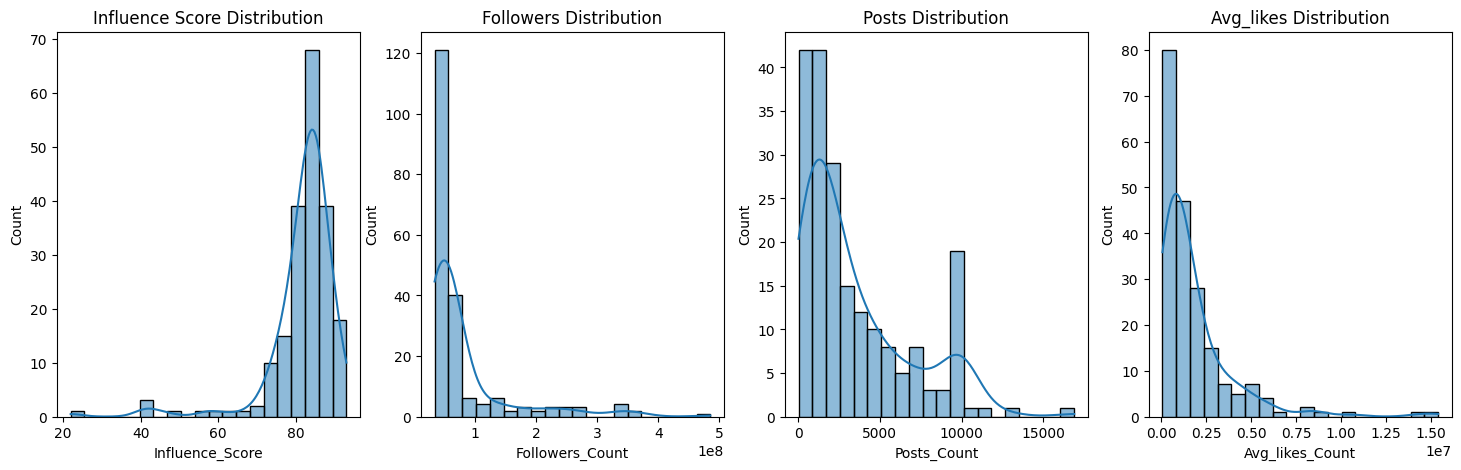

In [ ]:


fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Influence Score
sns.histplot(df['Influence_Score'], bins=20, kde=True, ax=axes[0])
axes[0].set_title('Influence Score Distribution')

# Followers
sns.histplot(df['Followers_Count'], bins=20, kde=True, ax=axes[1])
axes[1].set_title('Followers Distribution')

# Posts
sns.histplot(df['Posts_Count'], bins=20, kde=True, ax=axes[2])
axes[2].set_title('Posts Distribution')

# Average Likes
sns.histplot(df['Avg_likes_Count'], bins=20, kde=True, ax=axes[3])
axes[3].set_title('Avg_likes Distribution')



plt.show()


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Rank                     200 non-null    int64  
 1   Channel_Info             200 non-null    object 
 2   Influence_Score          200 non-null    int64  
 3   60Day_Eng_Rate           200 non-null    float64
 4   Country                  200 non-null    object 
 5   Followers_Count          200 non-null    float64
 6   Avg_likes_Count          200 non-null    float64
 7   Posts_Count              200 non-null    float64
 8   NewPost_Avg_Likes_Count  200 non-null    float64
 9   Total_Likes_Count        200 non-null    float64
dtypes: float64(6), int64(2), object(2)
memory usage: 15.8+ KB


# Observation
Standardizing the data to convert all data to a particular range also checking and correcting the Skewness in the dataset

In [ ]:
from sklearn.preprocessing import StandardScaler

numerical_columns = df.select_dtypes(include=['number']).columns

scaler = StandardScaler()

# Fit and transform only the numerical columns
df[numerical_columns] = scaler.fit_transform(df[numerical_columns])

# Display the standardized DataFrame
print("\nStandardized DataFrame (only numerical columns):")
df


Standardized DataFrame (only numerical columns):


,Rank,Channel_Info,Influence_Score,60Day_Eng_Rate,Country,Followers_Count,Avg_likes_Count,Posts_Count,NewPost_Avg_Likes_Count,Total_Likes_Count
0,-1.723412,cristiano,1.146490,-0.189563,Spain,5.442188,3.162354,-0.018203,2.739335,4.587203
1,-1.706091,kyliejenner,1.033535,-0.158790,United States,3.910060,2.933694,1.066281,2.037760,9.687089
2,-1.688771,leomessi,0.920581,-0.281883,United States,3.819069,2.247712,-0.766798,1.228251,0.442420
3,-1.671450,selenagomez,1.259445,-0.435749,United States,3.617015,1.973319,-0.470071,0.256840,1.397522
4,-1.654129,therock,1.033535,-0.497296,United States,3.491233,0.006837,1.006032,-0.157629,1.613772
...,...,...,...,...,...,...,...,...,...,...
195,1.654129,khabib_nurmagomedov,-2.129196,-0.312656,Russia,-0.600688,-0.505089,0.343292,-0.495626,-0.098204
196,1.671450,danbilzerian,0.242853,1.379872,Canada,-0.600688,0.189765,-0.620694,0.472709,-0.116225
197,1.688771,raisa6690,-0.208966,-0.497296,Indonesia,-0.600688,-0.712164,0.222794,-0.604910,-0.484588
198,1.706091,luansantana,-0.321921,-0.497296,Brazil,-0.602026,-0.727941,-0.781860,-0.616027,-0.626718


In [ ]:
df[numerical_columns]['Avg_likes_Count'].skew()

3.1780102304693196

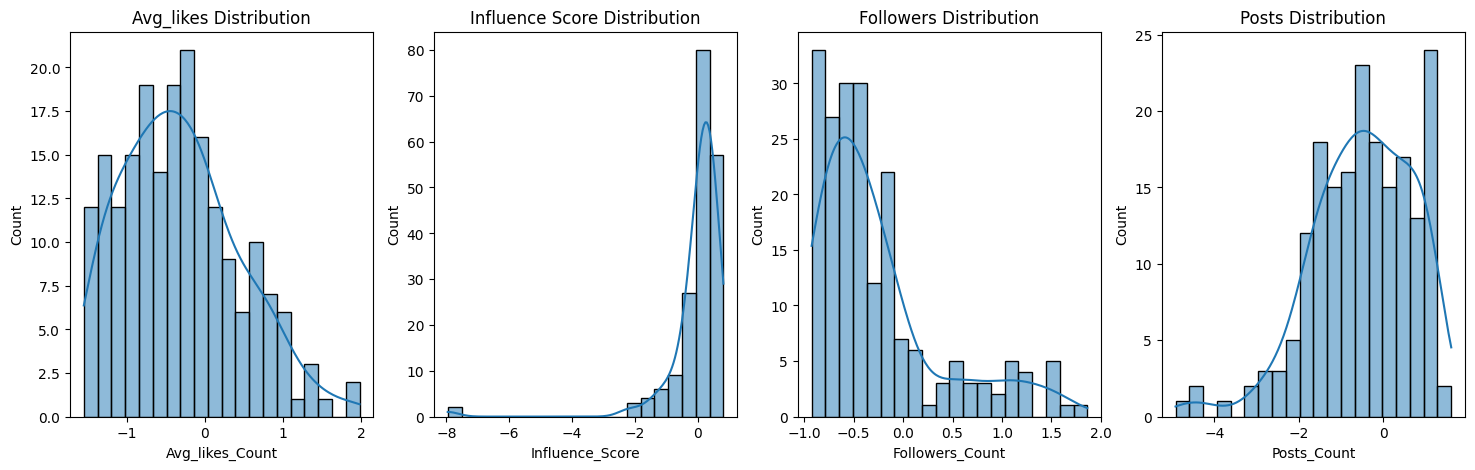

In [ ]:
import numpy as np

xx = df[numerical_columns]['Avg_likes_Count'].apply(lambda x: np.log1p(x))

fig, axes = plt.subplots(1, 4, figsize=(18, 5))

# Average Likes
sns.histplot(df[numerical_columns]['Avg_likes_Count'].apply(lambda x: np.log1p(x)) , bins=20, kde=True, ax=axes[0])
axes[0].set_title('Avg_likes Distribution')

# Influence Score
sns.histplot(df[numerical_columns]['Influence_Score'].apply(lambda x: np.log1p(x))  , bins=20, kde=True, ax=axes[1])
axes[1].set_title('Influence Score Distribution')

# Followers
sns.histplot(df[numerical_columns]['Followers_Count'].apply(lambda x: np.log1p(x)) , bins=20, kde=True, ax=axes[2])
axes[2].set_title('Followers Distribution')

# Posts
sns.histplot(df[numerical_columns]['Posts_Count'].apply(lambda x: np.log1p(x)), bins=20, kde=True, ax=axes[3])
axes[3].set_title('Posts Distribution')


plt.show()

In [ ]:
df[numerical_columns]

,Rank,Influence_Score,60Day_Eng_Rate,Followers_Count,Avg_likes_Count,Posts_Count,NewPost_Avg_Likes_Count,Total_Likes_Count
0,-1.723412,1.146490,-0.189563,5.442188,3.162354,-0.018203,2.739335,4.587203
1,-1.706091,1.033535,-0.158790,3.910060,2.933694,1.066281,2.037760,9.687089
2,-1.688771,0.920581,-0.281883,3.819069,2.247712,-0.766798,1.228251,0.442420
3,-1.671450,1.259445,-0.435749,3.617015,1.973319,-0.470071,0.256840,1.397522
4,-1.654129,1.033535,-0.497296,3.491233,0.006837,1.006032,-0.157629,1.613772
...,...,...,...,...,...,...,...,...
195,1.654129,-2.129196,-0.312656,-0.600688,-0.505089,0.343292,-0.495626,-0.098204
196,1.671450,0.242853,1.379872,-0.600688,0.189765,-0.620694,0.472709,-0.116225
197,1.688771,-0.208966,-0.497296,-0.600688,-0.712164,0.222794,-0.604910,-0.484588
198,1.706091,-0.321921,-0.497296,-0.602026,-0.727941,-0.781860,-0.616027,-0.626718


# Question 3: Country-wise Count


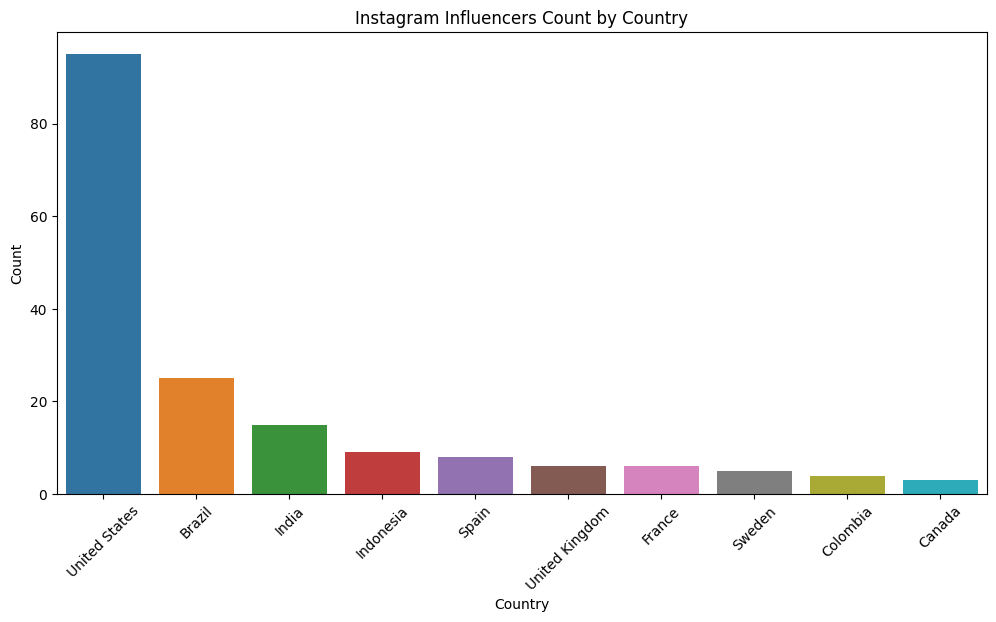

In [ ]:

country_count = df['Country'].value_counts()[:10]
plt.figure(figsize=(12, 6))
sns.barplot(x=country_count.index, y=country_count.values)
plt.title('Instagram Influencers Count by Country')
plt.xlabel('Country')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


# Observation

United States have more number of infulencers followed by Brazil and India was at the 3rd position in the Country wise influencer counts

# Question 4: Top 10 Influencers

In [ ]:



top_10_followers = df.nlargest(10, 'Followers_Count')
top_10_avg_likes = df.nlargest(10, 'NewPost_Avg_Likes_Count')
top_10_total_likes = df.nlargest(10, 'Total_Likes_Count')




In [ ]:
print("\nTop 10 Influencers based on Followers:")
print(top_10_followers[['Channel_Info', 'Followers_Count']])





Top 10 Influencers based on Followers:
      Channel_Info  Followers_Count
0        cristiano         5.442188
1      kyliejenner         3.910060
2         leomessi         3.819069
3      selenagomez         3.617015
4          therock         3.491233
5     arianagrande         3.405595
6    kimkardashian         3.374818
7          beyonce         2.644213
8  khloekardashian         2.614775
9     justinbieber         2.428779


In [ ]:
print("\nTop 10 Influencers based on Average Likes:")
print(top_10_avg_likes[['Channel_Info', 'NewPost_Avg_Likes_Count']])




Top 10 Influencers based on Average Likes:
       Channel_Info  NewPost_Avg_Likes_Count
96              thv                 6.301176
131             j.m                 4.736124
54   tomholland2013                 3.602811
22          zendaya                 3.386942
38     lalalalisa_m                 3.225040
25       badgalriri                 3.063139
165           rkive                 2.847269
0         cristiano                 2.739335
138      badbunnypr                 2.307596
49   jennierubyjane                 2.253629


In [ ]:
print("\nTop 10 Influencers based on Total Likes:")
print(top_10_total_likes[['Channel_Info', 'Total_Likes_Count']])


Top 10 Influencers based on Total Likes:
     Channel_Info  Total_Likes_Count
1     kyliejenner           9.687089
0       cristiano           4.587203
22        zendaya           3.091477
6   kimkardashian           2.911269
5    arianagrande           2.676999
25     badgalriri           2.586895
19       neymarjr           1.938146
9    justinbieber           1.866063
16     nickiminaj           1.667834
4         therock           1.613772
